In [152]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import time

In [153]:
from sklearn.utils import shuffle

In [154]:
Y = pd.read_csv("target.txt",names=["target"])
names = [str(int) for int in list(range(1,123))]
names = ["X"+int for int in names]
X = pd.read_csv("features.txt",names=names)

In [155]:
X = X.values
Y = Y.values

## a

In [157]:
def softmargin(n,w,b,C,x,y):
    temp_max_sum = 0
    # j = (0,122) feature
    # i = (0,6414) number of cases
    # x[i] case i in x
    # x[i][j] case i feature j in x
    # w[j] each parameter
    temp_w_sum = np.dot(w,w)
    for i in range(n):
        temp_max_sum += max(0,1-y[i]*(np.dot(x[i],w)+b))
    return 0.5*temp_w_sum + C*temp_max_sum


In [158]:
def partial_wj(w,j,xi,yi,b):
    if yi*(np.dot(xi,w)+b) >= 1:
        return 0
    else:
        return -yi*xi[j]

In [159]:
def gradient_wj(w,j,C,x,y,b):
    temp_sum = 0
    for i in range(len(y)):
        temp_sum += partial_wj(w,j,x[i],y[i],b)
    return w[j] + C*temp_sum

In [160]:
def partial_b(w,xi,yi,b):
    if yi*(np.dot(xi,w)+b) >= 1:
        return 0
    else:
        return -yi

In [161]:
def gradient_b(w,b,C,x,y):
    temp_sum = 0
    for i in range(len(y)):
        temp_sum += partial_b(w,x[i],y[i],b)
    return C*temp_sum

In [162]:
def BatchGradientDescent(x,y):
    k = b = 0
    eps = 0.25
    eta = 0.0000003
    d = len(x[0])
    w = np.zeros(d)
    n = len(y)
    C = 100
    cost = 10000
    f_old = softmargin(n,w,b,C,x,y)
    f = []
    while cost > eps:
        for j in range(d):
            w[j] = w[j] - eta*gradient_wj(w,j,C,x,y,b)
        b = b - eta*gradient_b(w,b,C,x,y)
        f_new = softmargin(n,w,b,C,x,y)
        cost = abs(f_new - f_old)*100/f_old
        f_old = f_new
        f.append(f_new[0])
        if k%10 == 0:
            print("cost:", cost)
            print("Iteration:", k)
        k += 1
    return f


In [163]:
Start = time.time()
BGD_cost = BatchGradientDescent(X,Y)
End = time.time()
print("The running time for BGD is:", End-Start)

cost: [38.89291868]
Iteration: 0
cost: [0.39451094]
Iteration: 10
cost: [0.31617411]
Iteration: 20
cost: [0.30402508]
Iteration: 30
cost: [0.30396612]
Iteration: 40
cost: [0.30691618]
Iteration: 50
The running time for BGD is: 370.30693888664246


In [164]:
import random
random.seed(10086)
from sklearn.utils import shuffle
X1,Y1 = shuffle(X,Y)

def StochasticGradientDescent(x,y):
    k = b = 0
    i = 1
    eps = 0.001
    eta = 0.0001
    d = len(X[0])
    w = np.zeros(d)
    n = len(y)
    C = 100
    f_old = softmargin(n,w,b,C,x,y)
    cost_old = 0.5*f_old
    cost_new = 1000
    f = []
    while cost_new > eps:
        for j in range(d):
            w[j] = w[j] - eta*(w[j]+C*partial_wj(w,j,x[i],y[i],b))
        b = b - eta*C*partial_b(w,x[i],y[i],b)
        f_new = softmargin(n,w,b,C,x,y)
        if k == 0:
            cost_new = 0.5*(abs(f_new - f_old)*100/f_old)
        else:
            cost_new = 0.5*(abs(f_new - f_old)*100/f_old) + 0.5*cost_old
        f_old = f_new
        cost_old = cost_new
        i = (i%n)+1
        f.append(f_new[0])
        if k%500 ==0:
            print("cost:", cost_new)
            print("Iteration:", k)
        k += 1
    return f


In [165]:
Start = time.time()
SGD_cost = StochasticGradientDescent(X1,Y1)
End = time.time()
print("The running time for SGD is:", End-Start)

cost: [1.59674145]
Iteration: 0
cost: [1.30766404]
Iteration: 500
cost: [0.05772389]
Iteration: 1000
cost: [0.0298056]
Iteration: 1500
cost: [0.83853692]
Iteration: 2000
cost: [0.69810909]
Iteration: 2500
cost: [1.00549747]
Iteration: 3000
cost: [0.00212938]
Iteration: 3500
cost: [0.72745517]
Iteration: 4000
cost: [0.07439594]
Iteration: 4500
The running time for SGD is: 245.87482714653015


In [166]:
def MiniBatchGradientDescent(x,y):
    k = b = 0
    eps = 0.01
    eta = 0.00001
    d = len(X[0])
    w = np.zeros(d)
    n = len(y)
    C = 100
    f_old = softmargin(n,w,b,C,x,y)
    cost_old = 0.5*f_old
    cost_new = 1000
    f = []
    batch_size = 20
    l = 1
    while cost_new >eps:
        a = int(l)*batch_size+1
        c = min(n, (int(l)+1)*batch_size)
        for j in range(d):
            w[j] = w[j] - eta*gradient_wj(w,j,C,x[a:c],y[a:c],b)
        b = b - eta*gradient_b(w,b,C,x[a:c],y[a:c])
        l = (l+1)%((n+batch_size-1)/batch_size)
        f_new = softmargin(n,w,b,C,x,y)
        if k == 0:
            cost_new = 0.5*(abs(f_new - f_old)*100/f_old)
        else:
            cost_new = 0.5*(abs(f_new - f_old)*100/f_old) + 0.5*cost_old
        f_old = f_new
        cost_old = cost_new
        f.append(f_new[0])
        if k%200 == 0:
            print("cost:", cost_new)
            print("Iteration:", k)
        k += 1
    return f

In [167]:
Start = time.time()
MBGD_cost = MiniBatchGradientDescent(X1,Y1)
End = time.time()
print("The running time for MBGD is:", End-Start)

cost: [2.70376515]
Iteration: 0
cost: [0.13064641]
Iteration: 200
cost: [0.06286008]
Iteration: 400
The running time for MBGD is: 34.10087561607361


## b

Text(0, 0.5, 'Cost Function')

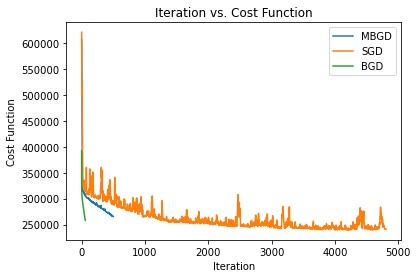

In [168]:
plt.plot(list(range(len(MBGD_cost))),MBGD_cost, label = "MBGD")
plt.plot(list(range(len(SGD_cost))),SGD_cost, label = "SGD")
plt.plot(list(range(len(BGD_cost))),BGD_cost, label = "BGD")
plt.legend()
plt.title("Iteration vs. Cost Function")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")

We can see that Batch Gradient Descent has the lowest iteration. This is because Batch Gradient Descent takes information from the whole dataset, so it needs the least amount of iterations. Howerver, it takes the longest amount of time to converge, 370 seconds.

For Stochastic Gradient Descent, it takes the highest amount of iterations. Stochastic Gradient Descent calculates the gradient for one case each time, so it uses less time to find parameter. Because it collect information from randomly selected points, it uses less computational cost to find enough information tha Batch Gradient Descent. It takes the medium amount of time to converge, 245 seconds

For Minibatch Gradient Descent. it combines the advantage of Stochastic Gradient Descent and Batch Gradient Descent, so it takes the least amount of time to converge, 34 seconds